In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading data
data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

c:\Users\Namitha john\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
!pip  install seaborn

import seaborn as sns 

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/294.9 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 326.8 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00


In [4]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

In [5]:
df_da_us = df_da_us.explode('job_skills')

In [6]:
df_da_us_grouped = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_da_top_pay = df_da_us_grouped.sort_values(by='median', ascending= False).head(10)
df_da_top_skills = df_da_us_grouped.sort_values(by= 'count', ascending= False).head(10).sort_values(by='median', ascending= False)

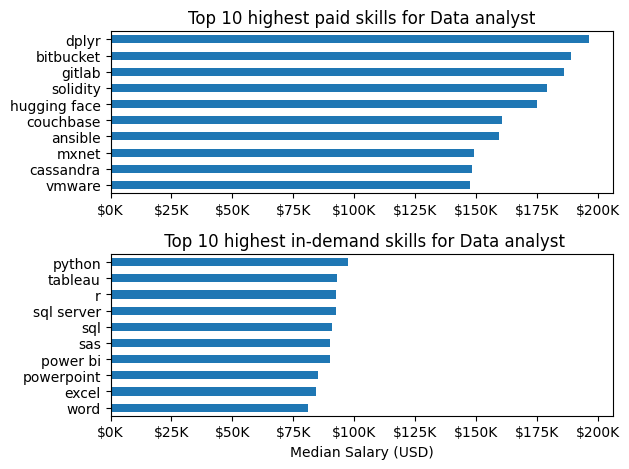

In [7]:
fig, ax = plt.subplots(2,1)

df_da_top_pay[::-1].plot(kind = 'barh', y='median', ax= ax[0], legend=False)

ax[0].set_title('Top 10 highest paid skills for Data analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

df_da_top_skills[::-1].plot(kind = 'barh', y='median', ax= ax[1], legend= False)

ax[1].set_title(' Top 10 highest in-demand skills for Data analyst')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()

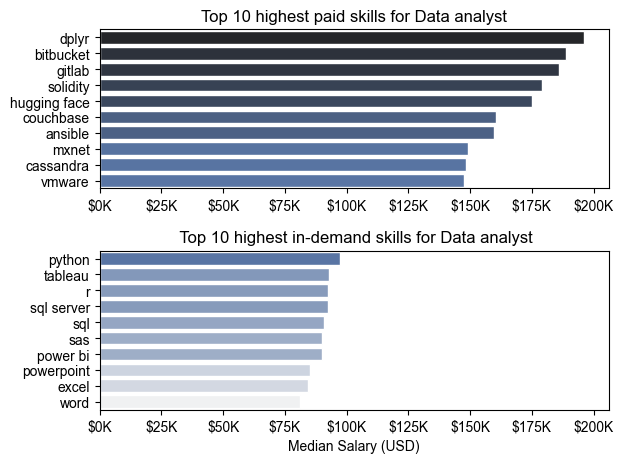

In [15]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

#df_da_top_pay[::-1].plot(kind = 'barh', y='median', ax= ax[0], legend=False)
sns.barplot(data =df_da_top_pay, x = 'median', y= df_da_top_pay.index, ax=ax[0], hue='median', palette="dark:b_r")
ax[0].legend().remove()
ax[0].set_title('Top 10 highest paid skills for Data analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

#df_da_top_skills[::-1].plot(kind = 'barh', y='median', ax= ax[1], legend= False)
sns.barplot(data =df_da_top_skills, x = 'median', y= df_da_top_skills.index, ax=ax[1], hue='median', palette="light:b")
ax[1].legend().remove()
ax[1].set_title(' Top 10 highest in-demand skills for Data analyst')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()

Text(0, 0.5, 'Number of jobs')

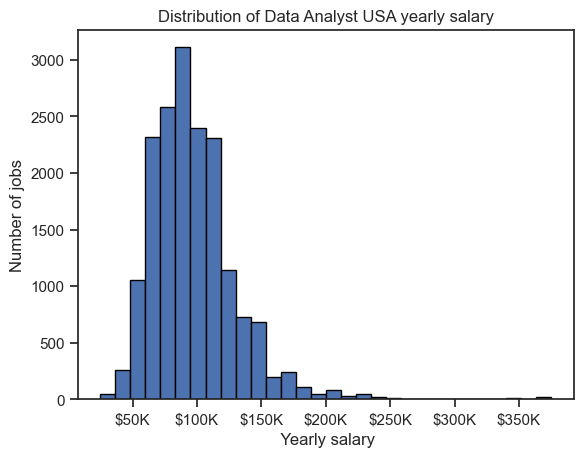

In [19]:
df_da_us['salary_year_avg'].plot(kind = 'hist', bins = 30, edgecolor = 'black')


ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

plt.title('Distribution of Data Analyst USA yearly salary')
plt.xlabel(' Yearly salary')
plt.ylabel('Number of jobs')

Text(12.444444444444445, 0.5, 'Number of jobs')

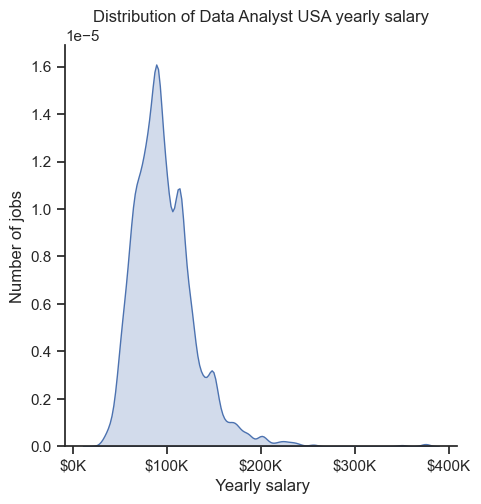

In [21]:
sns.displot(df_da_us['salary_year_avg'], kind='kde', fill= True)


ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

plt.title('Distribution of Data Analyst USA yearly salary')
plt.xlabel(' Yearly salary')
plt.ylabel('Number of jobs')

(0.0, 600000.0)

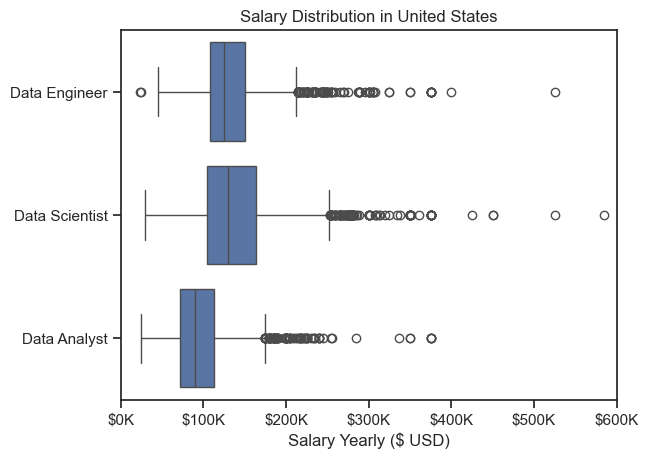

In [23]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_us = df_us.dropna(subset=['salary_year_avg'])

sns.boxplot(data = df_us, x='salary_year_avg', y= 'job_title_short')
plt.title('Salary Distribution in United States')
plt.xlabel('Salary Yearly ($ USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)